<a href="https://colab.research.google.com/github/Seblao/New_deposit/blob/main/Qu%C3%AAte_Introduction_au_Machine_Learning_R%C3%A9gr%C3%A9ssion_lin%C3%A9aire_simple%2C_multiple_et_polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://storage.googleapis.com/quest_editor_uploads/9aMWaGGxxMBn605YuI1yAqxwof55Adxw.jpg)

Vous utiliserez les données ci-dessous. Créez un dataframe à partir de ces liens :       
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Faite une jointure entre les deux dataframes sur la base de la colonne de date. Le dataframe opinion sera le dataframe de gauche.

In [53]:
# URL du 1er fichier CSV :
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"

df1 = pd.read_csv(url)
df1.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7


In [54]:
# URL du 2ème fichier CSV :
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"


df2 = pd.read_csv(url)
df2.head()

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad


In [55]:
# Renomme la colonne "DATE" en "date" ds df1 :
df1.rename(columns={"DATE": "date"}, inplace=True)

df_merged = pd.merge(df1, df2, on="date", how="inner")
df_merged

,date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113,0,3,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122,0,3,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122,0,3,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116,0,3,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116,0,3,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119,0,1,8.7,very bad
337,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113,0,1,8.7,very bad
338,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116,0,1,8.7,very bad
339,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143,0,1,3.3,very bad


Des valeurs sans manquantes après la jointure. Identifiez les colonnes et les lignes concernées et créer un dataframe qui ne contient que les lignes ayant des valeurs manquantes

In [56]:
# Il n'y a aucune valeur manquante....
df_merged.isnull().sum()

,0
date,0
MAX_TEMPERATURE_C,0
MIN_TEMPERATURE_C,0
WINDSPEED_MAX_KMH,0
TEMPERATURE_MORNING_C,0
TEMPERATURE_NOON_C,0
TEMPERATURE_EVENING_C,0
PRECIP_TOTAL_DAY_MM,0
HUMIDITY_MAX_PERCENT,0
VISIBILITY_AVG_KM,0


Créer une fonction qui va prédire la valeur de la colonne SUNHOUR sur la base :    
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Vous aurez au préalable splitter les données entre un train et un test split

Vous utiliserez les modèles ci-dessous :
- LinearSVR
- SGDRegressor
- LinearRegression
- KNeighborsRegressor

Faites la moyenne entre le score du train et du test split pour chaque modèle. Pour quelles données et avec quel modèle obtient-on la valeur la plus élevée ?

In [57]:

# Vérifie les colonnes numériq :
numerical_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()

# Vérifie la corrélat° avec la colonne "SUNHOUR" :
correlations = df_merged[numerical_cols].corr()["SUNHOUR"].abs().sort_values(ascending=False)

# Sélectionne les colonnes avec |correlation| >= 0.5 (sf SUNHOUR elle-même) :
selected_features = correlations[correlations >= 0.5].index.tolist()
selected_features.remove("SUNHOUR")

selected_features

['CLOUDCOVER_AVG_PERCENT',
 'HEATINDEX_MAX_C',
 'TEMPERATURE_NOON_C',
 'MAX_TEMPERATURE_C',
 'TEMPERATURE_EVENING_C',
 'WINDTEMP_MAX_C',
 'HUMIDITY_MAX_PERCENT',
 'DEWPOINT_MAX_C']

In [58]:
# Créat° du jeu de données :
X_selected = df_merged[selected_features]
X_all = df_merged[numerical_cols].drop(columns=["SUNHOUR"])
y = df_merged["SUNHOUR"]

In [59]:
# Split train/test (80 % train, 20 % test) :
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [60]:
# Liste des modèles :
models = {
    "LinearSVR": LinearSVR(max_iter=10000),
    "SGDRegressor": SGDRegressor(max_iter=10000),
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5)
}

In [61]:
# Fct° pr entraîner et évaluer les modèles :
def evaluate_models(X_train, X_test, y_train, y_test):
    scores = {}
    for name, model in models.items():
# Entraînemt :
        model.fit(X_train, y_train)
        train_score = r2_score(y_train, model.predict(X_train))
        test_score = r2_score(y_test, model.predict(X_test))
# Moy. des scores :
        mean_score = (train_score + test_score) / 2
        scores[name] = mean_score
        print(f"{name} → Train: {train_score:.3f}, Test: {test_score:.3f}, Moyenne: {mean_score:.3f}")
    return scores

In [62]:
# Évaluat° des mdèles sur les 2 ensbles :
scores_selected = evaluate_models(X_train_sel, X_test_sel, y_train, y_test)

scores_all = evaluate_models(X_train_all, X_test_all, y_train, y_test)

# Trver le meilleur mdèle et dataset :
best_selected_model = max(scores_selected, key=scores_selected.get)

best_all_model = max(scores_all, key=scores_all.get)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR → Train: 0.614, Test: 0.502, Moyenne: 0.558
SGDRegressor → Train: -3169305830715899571601408.000, Test: -3462907088214371560587264.000, Moyenne: -3316106459465135566094336.000
LinearRegression → Train: 0.679, Test: 0.657, Moyenne: 0.668
KNeighborsRegressor → Train: 0.781, Test: 0.713, Moyenne: 0.747
LinearSVR → Train: 0.589, Test: 0.483, Moyenne: 0.536
SGDRegressor → Train: -42085148570409916300414418944.000, Test: -46568601700669221101195231232.000, Moyenne: -44326875135539573098851336192.000
LinearRegression → Train: 0.743, Test: 0.699, Moyenne: 0.721
KNeighborsRegressor → Train: 0.805, Test: 0.722, Moyenne: 0.764


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
# Le meilleur modèle est le KneighborsRegressor avec : KNeighborsRegressor → Train: 0.781, Test: 0.713, Moyenne: 0.747 ; valeur proche de 1.

Effectuez une régression polynomiale sur les données :     
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Le score de la régression polynomiale est t'il meilleur que celui des autres modèles ?

In [64]:
# Fct° pr entraîner et évaluer les modèles :
def evaluate_models(X_train, X_test, y_train, y_test, poly_degree=None):
    scores = {}

# Régress° polynomiale :
    if poly_degree:
        poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
        poly_model.fit(X_train, y_train)
        train_score = r2_score(y_train, poly_model.predict(X_train))
        test_score = r2_score(y_test, poly_model.predict(X_test))
        mean_score = (train_score + test_score) / 2
        scores[f"Polynomial Regression (deg {poly_degree})"] = mean_score

# Test les mdèles :
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_score = r2_score(y_train, model.predict(X_train))
        test_score = r2_score(y_test, model.predict(X_test))
        mean_score = (train_score + test_score) / 2
        scores[name] = mean_score
        print(f"{name} → Train: {train_score:.3f}, Test: {test_score:.3f}, Moyenne: {mean_score:.3f}")

    return scores

# Évaluat° des mdèles sur les 2 ensbles de données :
scores_selected = evaluate_models(X_train_sel, X_test_sel, y_train, y_test, poly_degree=2)

scores_all = evaluate_models(X_train_all, X_test_all, y_train, y_test, poly_degree=2)

# Trve le meilleur mdèle :
best_selected_model = max(scores_selected, key=scores_selected.get)
best_all_model = max(scores_all, key=scores_all.get)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR → Train: 0.571, Test: 0.441, Moyenne: 0.506
SGDRegressor → Train: -1109412821455167066996736.000, Test: -1297677640184379383742464.000, Moyenne: -1203545230819773158260736.000
LinearRegression → Train: 0.679, Test: 0.657, Moyenne: 0.668
KNeighborsRegressor → Train: 0.781, Test: 0.713, Moyenne: 0.747
LinearSVR → Train: 0.263, Test: 0.373, Moyenne: 0.318
SGDRegressor → Train: -88008644126960376620882329600.000, Test: -95344660745940785173450719232.000, Moyenne: -91676652436450580897166524416.000
LinearRegression → Train: 0.743, Test: 0.699, Moyenne: 0.721
KNeighborsRegressor → Train: 0.805, Test: 0.722, Moyenne: 0.764


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
# Le score de la Régress° Polynomiale est moins bon qu'avec les autres tests classiques.

Remplissez les valeurs manquantes du dataframe avec les prédictions du modèle le plus performant. Avant, vous ajouterez une colonne qui permet de faire la différence entre les valeurs réelles et les valeurs prédites (celle qui étaient manquantes). Enfin, vous créerez une colonne qui contient les prédiction du modèle sur l'ensemble des valeurs.


In [66]:
# Il n'y a pas de valeurs manquantes dans le dataframe !!!!

Créez un scatterplot avec en X les dates et en y la SUNHOUR. Vous le colorierez pour obtenir un résultat qui ressemble à l'image ci-dessous dans lequel sont supperposés les valeurs réelles (uniquement) et les valeurs prédites. Ajoutez également une légende pour identifier les valeurs réelles et les valeurs prédites (dans notre cas les valeurs prédites sont en bleu et les valeurs réelles en orange).


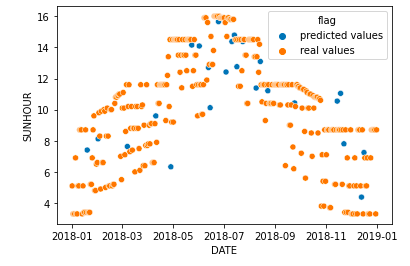

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


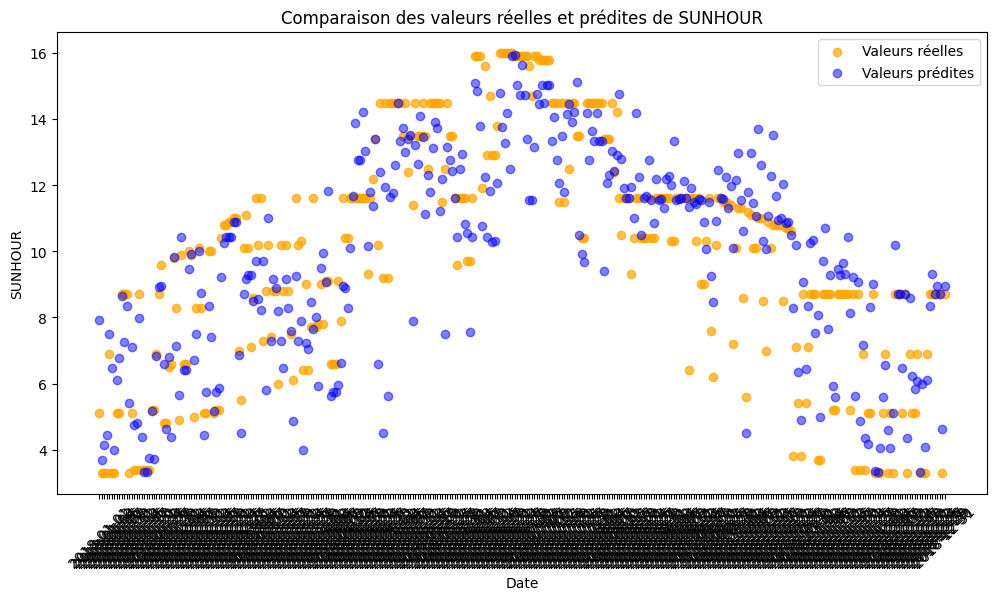

In [84]:
# Définir X et y
X = df_merged[numerical_cols].drop(columns=["SUNHOUR"])  # Variables explicatives
y = df_merged["SUNHOUR"]  # Variable cible

# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à tester
models = {
    "LinearSVR": LinearSVR(max_iter=10000),
    "SGDRegressor": SGDRegressor(max_iter=10000),
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor()
}

# Stocker les scores :
best_model = None
best_score = -np.inf

for name, model in models.items():
# Entraînemt :
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

# Calcul du score moyen (moy. entre train et test) :
    score_train = r2_score(y_train, y_train_pred)
    score_test = r2_score(y_test, y_test_pred)
    mean_score = (score_train + score_test) / 2

# Mise à jr du meilleur modèle :
    if mean_score > best_score:
        best_score = mean_score
        best_model = model

# Prédict° finales avec le meilleur modèle :
df_merged["SUNHOUR_PRED"] = best_model.predict(X)

# Visualisat° des résultats :
plt.figure(figsize=(12, 6))

# Scatterplot des vleurs réelles (orange) :
plt.scatter(df_merged["date"], df_merged["SUNHOUR"], color="orange", label="Valeurs réelles", alpha=0.7)

# Scatterplot des vleurs prédites (bleu) :
plt.scatter(df_merged["date"], df_merged["SUNHOUR_PRED"], color="blue", label="Valeurs prédites", alpha=0.5)

# Mise en frme du graph :
plt.xlabel("Date")
plt.ylabel("SUNHOUR")
plt.title("Comparaison des valeurs réelles et prédites de SUNHOUR")

plt.legend()
plt.xticks(rotation=45)
plt.show()

Que signifie la superposition des cercles dans le scatterplot ?

In [ ]:
# Cela signifie que les valeurs des points ont des valeurs très proches où identiques.